In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np

sns.set()
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Read data
train = pd.read_csv(".../train.csv")
test = pd.read_csv(".../test.csv")

## Basic Exploration

In [25]:
# Sample size
print(train.shape)
print(test.shape)

(2476, 18)
(1220, 18)


In [26]:
# Missing Value
train.info()
train.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 18 columns):
SUBSCRIPTION_FEE    2476 non-null int64
JOB_ACTIVITY_2      2476 non-null int64
JOB_ACTIVITY_3      2476 non-null int64
JOB_ACTIVITY_4      2476 non-null int64
JOB_ACTIVITY_1      2476 non-null int64
JOB_ACTIVITY_5      2476 non-null int64
PAYMENT_TYPE_1      2476 non-null float64
PAYMENT_TYPE_2      2476 non-null float64
PAYMENT_TYPE_3      2476 non-null float64
PAYMENT_TYPE_4      2476 non-null float64
PAYMENT_TYPE_5      2476 non-null float64
COMPANY_SIZE        2476 non-null object
indus_A             2476 non-null float64
indus_B             2476 non-null float64
indus_C             2476 non-null float64
indus_D             2476 non-null float64
indus_E             2476 non-null float64
indus_F             2476 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 348.3+ KB


SUBSCRIPTION_FEE    False
JOB_ACTIVITY_2      False
JOB_ACTIVITY_3      False
JOB_ACTIVITY_4      False
JOB_ACTIVITY_1      False
JOB_ACTIVITY_5      False
PAYMENT_TYPE_1      False
PAYMENT_TYPE_2      False
PAYMENT_TYPE_3      False
PAYMENT_TYPE_4      False
PAYMENT_TYPE_5      False
COMPANY_SIZE        False
indus_A             False
indus_B             False
indus_C             False
indus_D             False
indus_E             False
indus_F             False
dtype: bool

In [27]:
train.head()

,SUBSCRIPTION_FEE,JOB_ACTIVITY_2,JOB_ACTIVITY_3,JOB_ACTIVITY_4,JOB_ACTIVITY_1,JOB_ACTIVITY_5,PAYMENT_TYPE_1,PAYMENT_TYPE_2,PAYMENT_TYPE_3,PAYMENT_TYPE_4,PAYMENT_TYPE_5,COMPANY_SIZE,indus_A,indus_B,indus_C,indus_D,indus_E,indus_F
0,16,20,22,20,22,3,3365.00,0.00,0.00,1485.0,1880.00,C,0.0,0.0,0.0,0.0,1.0,0.0
1,41,0,6,5,1,0,10589.00,2164.00,2164.00,0.0,8425.00,C,0.0,1.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0.00,0.00,0.00,0.0,0.00,A,0.0,0.0,1.0,0.0,0.0,0.0
3,83,31,57,43,62,35,100237.34,71692.23,71692.23,540.0,28005.11,B,0.0,0.0,0.0,0.0,0.0,1.0
4,16,2,17,12,20,11,14506.50,0.00,0.00,0.0,13507.50,B,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
train.describe()

,SUBSCRIPTION_FEE,JOB_ACTIVITY_2,JOB_ACTIVITY_3,JOB_ACTIVITY_4,JOB_ACTIVITY_1,JOB_ACTIVITY_5,PAYMENT_TYPE_1,PAYMENT_TYPE_2,PAYMENT_TYPE_3,PAYMENT_TYPE_4,PAYMENT_TYPE_5,indus_A,indus_B,indus_C,indus_D,indus_E,indus_F
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,54.170436,25.278675,50.355412,37.096123,78.665186,18.959612,22132.569317,5004.050109,936.683833,713.678417,12303.008784,0.145800,0.296446,0.201535,0.043619,0.228191,0.084410
std,65.849544,49.780373,80.751539,64.961636,224.943862,34.570765,40058.923966,11539.239605,4479.929735,2075.736376,24320.175080,0.352977,0.456782,0.401227,0.204287,0.419751,0.278058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-55.500000,-500.000000,0.000000,-865.000000,-55.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,5.000000,2.000000,3.000000,0.000000,711.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,5.000000,23.000000,17.000000,24.000000,5.000000,7942.490000,614.780000,0.000000,0.000000,3032.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,30.250000,63.000000,45.000000,71.000000,22.000000,26357.755000,4877.715000,0.000000,501.250000,13761.107500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1036.000000,680.000000,1403.000000,1329.000000,4276.000000,421.000000,759001.430000,142159.900000,114642.000000,37884.760000,364615.530000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Odds Detection
There are some negative values in payment_type, which made me confused. However the size of these sample is very samll. So I assumed they are right collected and didn't eliminate them.

In [7]:
train[train.PAYMENT_TYPE_2 < 0]
train[train.PAYMENT_TYPE_5 < 0]
train[train.PAYMENT_TYPE_4 < 0]
train[train.PAYMENT_TYPE_1 < 0]

,INDUSTRY,SUBSCRIPTION_FEE,JOB_ACTIVITY_2,JOB_ACTIVITY_3,JOB_ACTIVITY_4,JOB_ACTIVITY_1,JOB_ACTIVITY_5,PAYMENT_TYPE_1,PAYMENT_TYPE_2,PAYMENT_TYPE_3,PAYMENT_TYPE_4,PAYMENT_TYPE_5,COMPANY_SIZE
2073,C,83,2,179,2,192,2,-55.5,0.0,0.0,0.0,-55.5,A


In [8]:
train.COMPANY_SIZE.value_counts()

B    1240
C     641
A     595
Name: COMPANY_SIZE, dtype: int64

## Linear relationship
The numerical features are linearly correlatted, which may course the multicollinearity problem when you try to understand the feature importance.

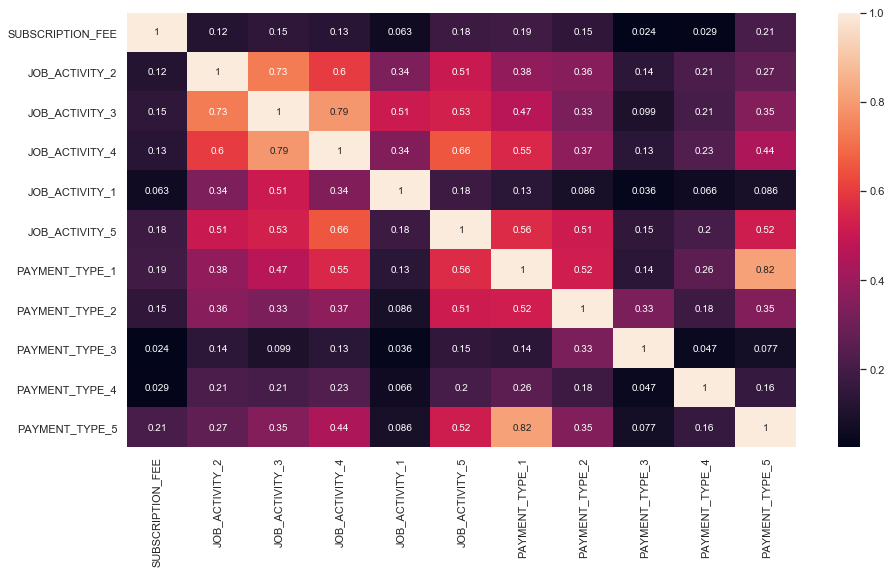

In [9]:
plt.rcParams['figure.figsize'] = [15, 8]
ax = sns.heatmap(train.corr(),annot=True)

## Feature Distribution
The numerical features are all skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ad62e48>,
      dtype=object)

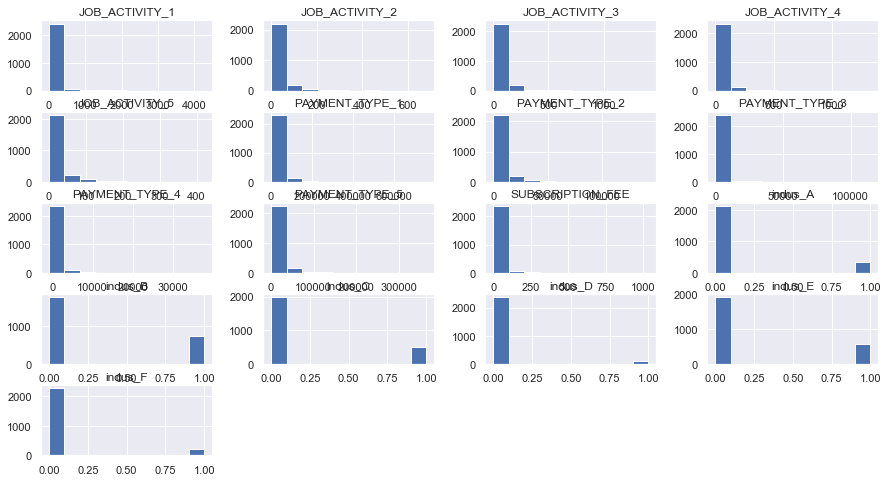

In [29]:
train.hist()

## Onehot Encoder
The industry feature is categorical feature which cannot be directly used for modelling. So I used onehotencoder to transform the data for modelling purpose.

In [10]:
# Feature engineering
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(pd.DataFrame(train.INDUSTRY))
indu = ["indus_"+i[3:] for i in enc.get_feature_names().tolist()]
train[indu] = pd.DataFrame(enc.transform(pd.DataFrame(train.INDUSTRY)).toarray())
train = train.drop(["INDUSTRY"], axis=1)

test[indu] = pd.DataFrame(enc.transform(pd.DataFrame(test.INDUSTRY)).toarray())
test = test.drop(["INDUSTRY","Unnamed: 0"], axis=1)

In [11]:
test.describe()

,SUBSCRIPTION_FEE,JOB_ACTIVITY_2,JOB_ACTIVITY_3,JOB_ACTIVITY_4,JOB_ACTIVITY_1,JOB_ACTIVITY_5,PAYMENT_TYPE_1,PAYMENT_TYPE_2,PAYMENT_TYPE_3,PAYMENT_TYPE_4,PAYMENT_TYPE_5,indus_A,indus_B,indus_C,indus_D,indus_E,indus_F
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,54.349180,24.131148,48.447541,36.348361,60.718852,18.971311,2.372257e+04,4546.193549,1054.708910,905.713189,13672.016352,0.147541,0.323770,0.194262,0.045902,0.209016,0.079508
std,67.764414,48.170577,72.608232,60.302008,111.772565,34.389364,4.971214e+04,9627.940444,4737.686506,4507.576547,37678.574475,0.354790,0.468106,0.395794,0.209358,0.406773,0.270641
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,5.000000,2.000000,4.000000,0.000000,5.881350e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,4.500000,25.000000,18.000000,27.000000,6.000000,8.403125e+03,550.000000,0.000000,0.000000,3466.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,28.000000,61.000000,44.000000,69.250000,23.000000,2.804192e+04,4513.612500,0.000000,563.287500,14233.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,796.000000,558.000000,829.000000,650.000000,1377.000000,462.000000,1.038283e+06,97400.230000,52559.000000,133112.730000,992692.740000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Downsample
The sample is imbalanced. The B type company have 2 times sample than A or C. So I downsampled the sample to make it even. Compared with the model based on original dataset, this method improved the model performance.

In [12]:
# Downsample to make it balanced
downsampled = resample(train[train.COMPANY_SIZE == "B"], 
                                 replace=False,    # sample without replacement
                                 n_samples=700)
df_downsampled = pd.concat([downsampled, train[train.COMPANY_SIZE != "B"]])

In [13]:
df_downsampled.COMPANY_SIZE.value_counts()

B    700
C    641
A    595
Name: COMPANY_SIZE, dtype: int64

## Train model
Split the dataset tot training and validating set to tune the parameter with the measure of model performance on validating set.

In [14]:
from sklearn.model_selection import train_test_split
y = df_downsampled.COMPANY_SIZE
X = df_downsampled.drop(["COMPANY_SIZE"], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [16]:
# Random Forest
parameters = {'max_depth':[5,8,10,12,15], 'n_estimators':[50, 80, 100, 150]}
rf         = RandomForestClassifier()
clf        = GridSearchCV(rf, parameters, cv=5).fit(X_train, y_train)
pred_y_0   = clf.predict(X_val)
print(classification_report(y_val, pred_y_0))
print(clf.best_params_)

              precision    recall  f1-score   support

           A       0.74      0.68      0.71       204
           B       0.62      0.65      0.63       241
           C       0.71      0.72      0.71       194

   micro avg       0.68      0.68      0.68       639
   macro avg       0.69      0.68      0.69       639
weighted avg       0.68      0.68      0.68       639

{'max_depth': 12, 'n_estimators': 150}


Retrain the model with the parameter selected on the train dataset, and generate the prediction of the test dataset.

In [17]:
y_test = test.COMPANY_SIZE
X_test = test.drop(["COMPANY_SIZE"], axis=1)

In [19]:
rf         = RandomForestClassifier(max_depth=12, n_estimators=150)
rf.fit(X, y)
pred_y_0   = rf.predict(X_test)
print(classification_report(y_test, pred_y_0))

              precision    recall  f1-score   support

           A       0.61      0.67      0.64       293
           B       0.73      0.64      0.68       611
           C       0.66      0.75      0.70       316

   micro avg       0.68      0.68      0.68      1220
   macro avg       0.67      0.69      0.67      1220
weighted avg       0.68      0.68      0.68      1220



## Generate the feature importance

In [20]:
# Collect feature importance
feature_import = pd.DataFrame()
#dt         = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)
feature_import['importance']= rf.feature_importances_.tolist()
feature_import['feature'] = X.columns.tolist()

feature_import = feature_import.sort_values(by="importance")
feature_import

,importance,feature
14,0.004894,indus_D
16,0.004948,indus_F
13,0.010333,indus_C
12,0.010631,indus_B
8,0.017340,PAYMENT_TYPE_3
15,0.023657,indus_E
11,0.027085,indus_A
9,0.044738,PAYMENT_TYPE_4
5,0.048102,JOB_ACTIVITY_5
7,0.054511,PAYMENT_TYPE_2


## Look at the SUBSCRIPTION_FEE impact on COMPANY_SIZE

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


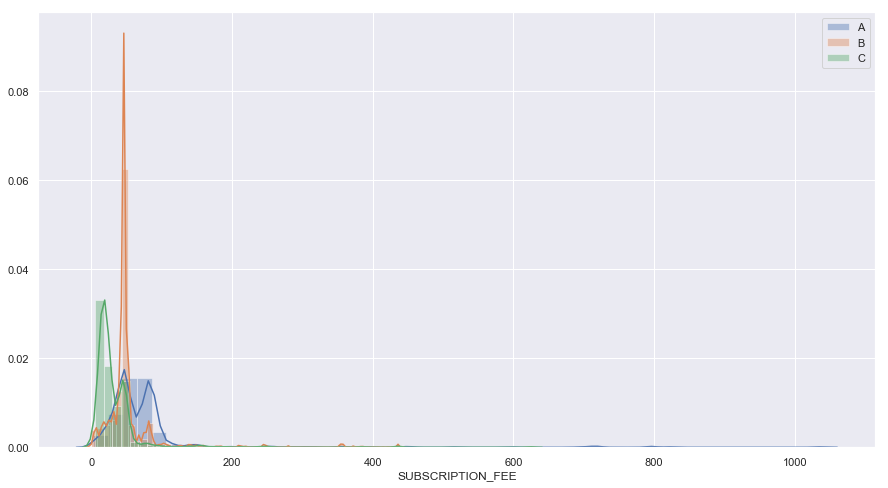

In [21]:
df1 = df_downsampled[df_downsampled.COMPANY_SIZE == "A"]
df2 = df_downsampled[df_downsampled.COMPANY_SIZE == "B"]
df3 = df_downsampled[df_downsampled.COMPANY_SIZE == "C"]

sns.distplot(df1.SUBSCRIPTION_FEE,kde=True,label="A")
sns.distplot(df2.SUBSCRIPTION_FEE,kde=True,label="B")
sns.distplot(df3.SUBSCRIPTION_FEE,kde=True,label="C")
plt.legend()